# Desafio de ciência de dados Indicium 2024
## Análise de dados exploratória e regressão - Aluguel de residências em NYC


Desenvolvido por: <b>João Vitor Vargas Soares</b>

### Importando bibliotecas

In [43]:
# Importando bibliotecas a serem usadas na EDA e regressão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.ticker as mtick
import joblib 

### Análise de dados exploratória

#### Investigando o dataset

Para começar a análise de dados exploratória, primeiramente foi feita a análise do arquivo do dataset fornecido para em seguida realizar a limpeza dos dados.

In [44]:
# Lendo arquivo com os dados de aluguel de residências em NYC
data = pd.read_csv("teste_indicium_precificacao.csv")

# Verificando numero de linhas e colunas do arquivo
print("Número de linhas: " + str(data.shape[0]) + "\nNúmero de colunas: " + str(data.shape[1]))

Número de linhas: 48894
Número de colunas: 16


Usando a função head(), foram impressas as 5 primeiras linhas do arquivo para verificar o formato do arquivo e os nomes das colunas

In [45]:
data.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


Em seguida, usando a função info(), verifiquei as informações relacionadas às colunas, como a quantidade de valores não nulos e os tipos de dados.

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

Utilizei a função nunique() para verificar a quantidade de valores únicos em cada coluna. Com isso, já é possível começar a identificar quais são as colunas com dados categóricos e quantitativos. 

In [47]:
data.nunique()

id                               48894
nome                             47904
host_id                          37457
host_name                        11452
bairro_group                         5
bairro                             221
latitude                         19048
longitude                        14718
room_type                            3
price                              674
minimo_noites                      109
numero_de_reviews                  394
ultima_review                     1764
reviews_por_mes                    937
calculado_host_listings_count       47
disponibilidade_365                366
dtype: int64

Verificando a existência de linhas duplicadas no arquivo. Como se pode ver, não há linhas duplicadas.

In [48]:
print("Número de linhas duplicadas: " + str(data.duplicated().sum()))

Número de linhas duplicadas: 0


Finalmente, foi impressa a quantidade de valores nulos em cada coluna, o que será útil na hora de fazer a limpeza dos dados a serem usados na análise e regressão.

In [49]:
data.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

#### Verificando distribuição das colunas e suas características

A função describe() foi usada para descrever as características estatísticas de cada uma das colunas para ajudar na identificação de outliers. Como mostrado abaixo, as colunas 'price' e 'minimo_noites' possuem valores máximos muito altos (última linha da tabela) quando comparado com a média, o que pode distorcer a realidade dos resultados finais.

In [50]:
data[['price', 'disponibilidade_365', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes']].describe()

,price,disponibilidade_365,minimo_noites,numero_de_reviews,reviews_por_mes
count,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000
mean,152.720763,112.776169,7.030085,23.274758,1.373251
std,240.156625,131.618692,20.510741,44.550991,1.680453
min,0.000000,0.000000,1.000000,0.000000,0.010000
25%,69.000000,0.000000,1.000000,1.000000,0.190000
50%,106.000000,45.000000,3.000000,5.000000,0.720000
75%,175.000000,227.000000,5.000000,24.000000,2.020000
max,10000.000000,365.000000,1250.000000,629.000000,58.500000


Histogramas foram usados para se entender a distribuição de cada variável. Como se pode verificar, as variáveis 'price' e 'minimo_noites' possuem histogramas mal distribuídos, sendo assim necessária a realização de uma limpeza de dados.

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'disponibilidade_365'}>],
       [<Axes: title={'center': 'minimo_noites'}>,
        <Axes: title={'center': 'numero_de_reviews'}>],
       [<Axes: title={'center': 'reviews_por_mes'}>, <Axes: >]],
      dtype=object)

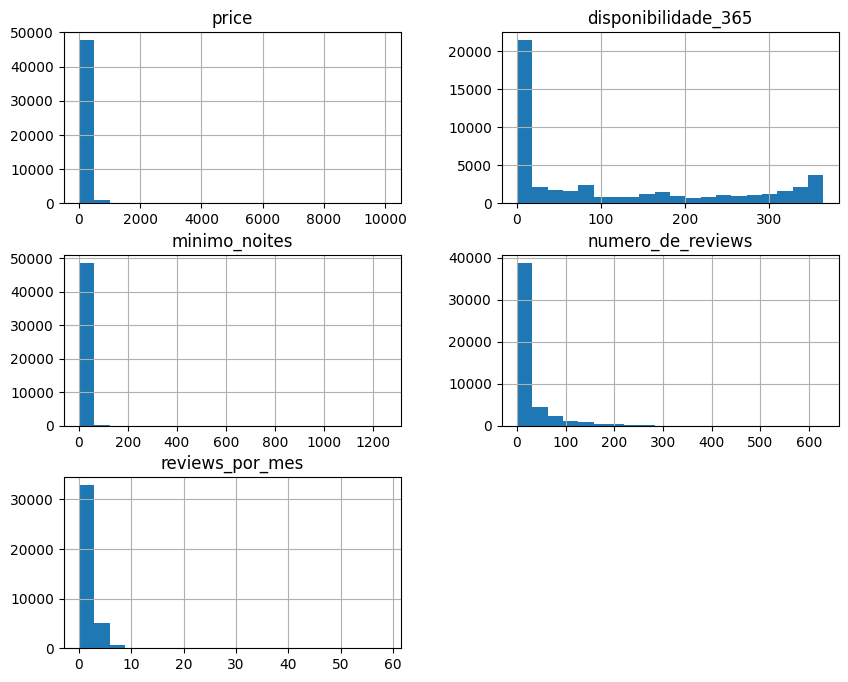

In [51]:
data[['price', 'disponibilidade_365', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes']].hist(bins=20, figsize=(10,8))

#### Identificação dos outliers

Para se identificar os outliers, o gráfico do tipo boxenplot foi usado. Ele é similar a boxplots, porém é melhor quando se quer analisar a distribuição das variáveis na cauda, porque tem mais quantis. As variáveis utilizadas nos gráficos foram 'price' e 'minimo_noites'. Foi utilizada escala logarítimica para que se possa visualizar melhor os quantis.

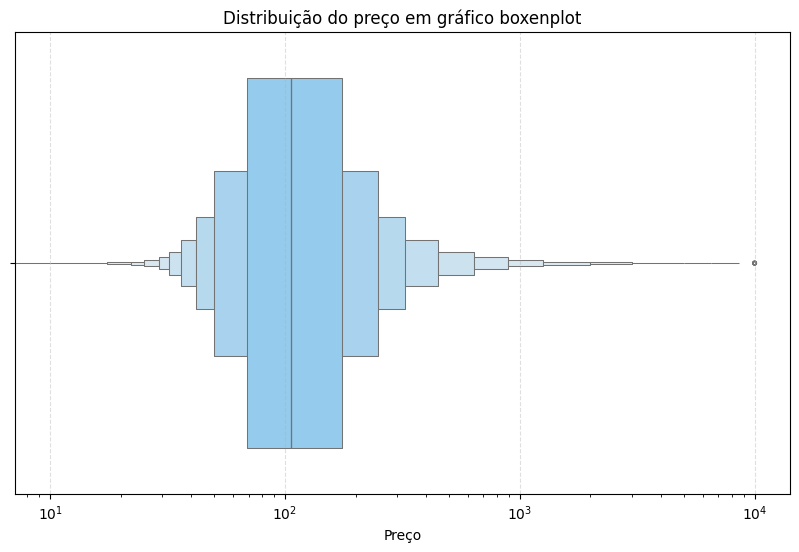

In [52]:
# Usando a função de boxenplot da biblioteca seaborn para a variável de preço
fig, ax = plt.subplots(figsize =(10, 6))
sns.boxenplot(data, x="price", color='lightskyblue', flier_kws={"marker": "."}, width=0.8, ax=ax)
ax.grid(axis="x", linestyle="--", alpha=0.4)

# Definindo escala do eixo x como logarítimica
ax.set_xscale("log")

plt.title('Distribuição do preço em gráfico boxenplot')
plt.xlabel('Preço')
plt.show()

Identificados os outliers, deve-se verificar qual é a percentagem deles com relação ao número total de listagens, definindo um threshold.

In [53]:
upperbound = np.round(len(data.loc[data["price"] > 600]["price"])*100/len(data), 2)
lowerbound = np.round(len(data.loc[data["price"] == 0]["price"])*100/len(data), 2)

print("--> Análise do preço")
print("Percentagem de valores maiores que o threshold definido: " + str(upperbound) + "%")
print("Percentagem de valores iguais a zero: " + str(lowerbound) + "%")

--> Análise do preço
Percentagem de valores maiores que o threshold definido: 1.59%
Percentagem de valores iguais a zero: 0.02%


O mesmo que foi feito para o preço foi feito para o número de noites.

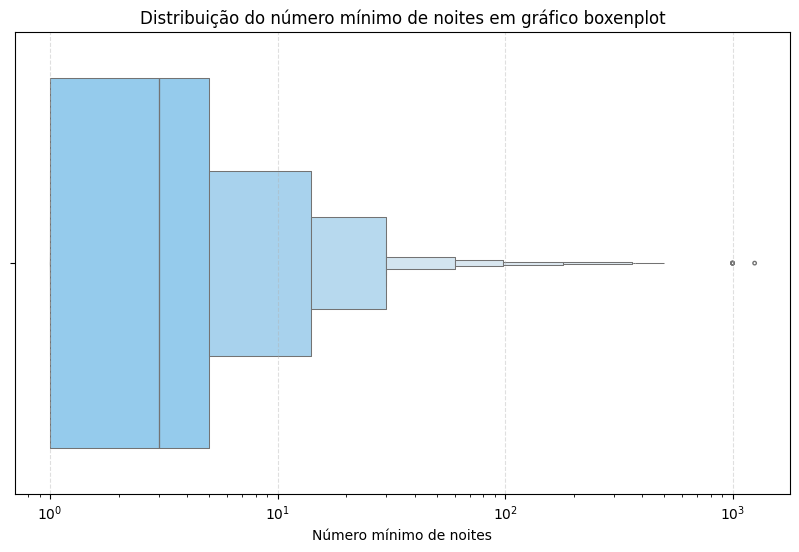

In [54]:
# Usando a função de boxenplot da biblioteca seaborn para a variável de preço
fig, ax = plt.subplots(figsize =(10, 6))
sns.boxenplot(data, x="minimo_noites", color="lightskyblue", flier_kws={"marker": "."}, width=0.8, ax=ax)
ax.grid(axis="x", linestyle="--", alpha=0.4)

# Definindo escala do eixo x como logarítimica
ax.set_xscale("log")

plt.title('Distribuição do número mínimo de noites em gráfico boxenplot')
plt.xlabel('Número mínimo de noites')
plt.show()

Identificados os outliers, deve-se verificar qual é a percentagem deles com relação ao número total de listagens, definindo um threshold.

In [55]:
upperbound = np.round(len(data.loc[data["minimo_noites"] > 30]["minimo_noites"])*100/len(data), 2)
print("--> Análise do número mínimo de noites")
print("Percentagem de valores maiores que o threshold definido: " + str(upperbound) + "%")

--> Análise do número mínimo de noites
Percentagem de valores maiores que o threshold definido: 1.53%


#### Limpeza dos dados e verificação do dataset limpo

Após a identificação dos outliers, deve-se fazer a limpeza dos dados. Para isso, os valores acima dos thresholds definidos e os zeros foram retirados do dataset. Novos histogramas foram plotados, mostrando uma melhor distribuição das listagens. 

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'disponibilidade_365'}>],
       [<Axes: title={'center': 'minimo_noites'}>,
        <Axes: title={'center': 'numero_de_reviews'}>],
       [<Axes: title={'center': 'reviews_por_mes'}>, <Axes: >]],
      dtype=object)

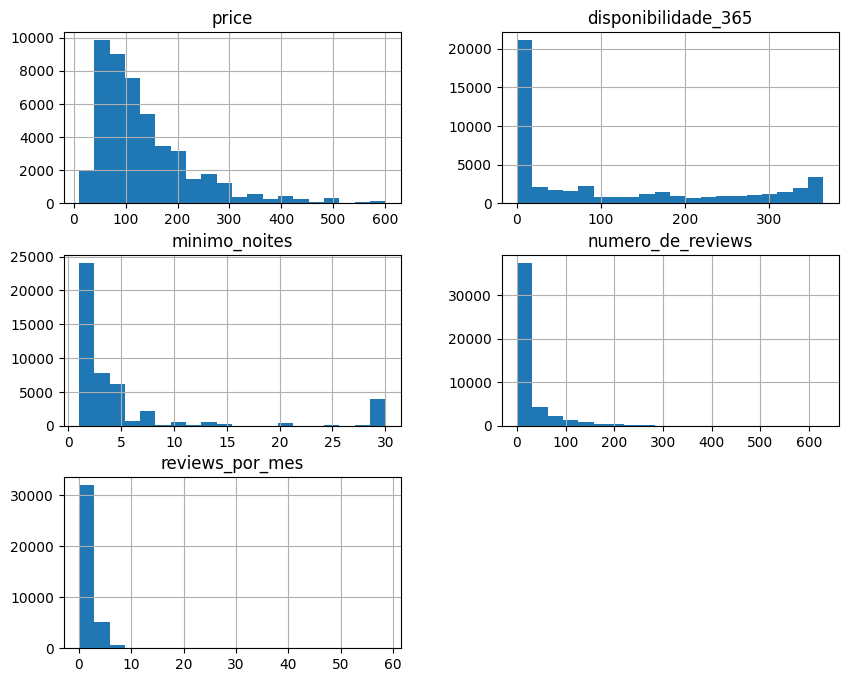

In [56]:
data_clean = data[(data["minimo_noites"] <= 30) & (data["price"] <= 600) & (data["price"] != 0)].copy()
data_clean[['price', 'disponibilidade_365', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes']].hist(bins=20, figsize=(10,8))

#### Análise do tipo de quarto (room_type)

A primeira análise foi feita com relação ao tipo de quarto. Inicialmente, foi plotado um gráfico de barras com as percentagens de cada tipo de quarto referentes ao número de listagens total.

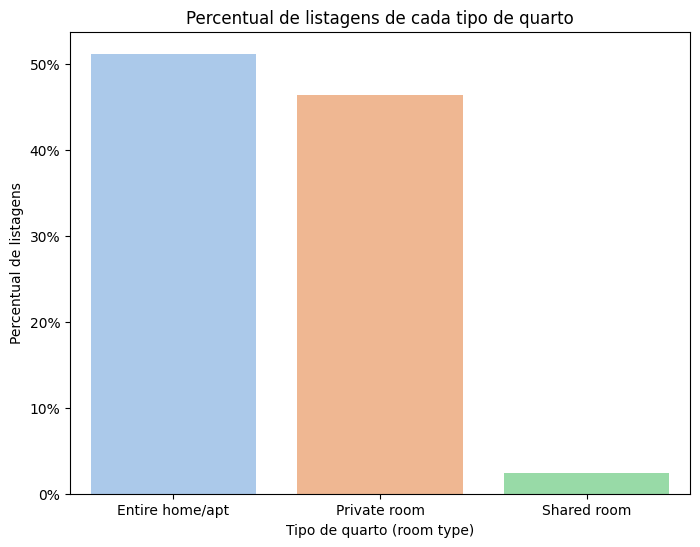

In [57]:
fig, ax = plt.subplots(figsize =(8, 6))
sns.countplot(data_clean, x="room_type", palette="pastel", hue="room_type", stat="percent", ax=ax)
plt.xlabel('Tipo de quarto (room type)')
plt.ylabel('Percentual de listagens')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Percentual de listagens de cada tipo de quarto')
plt.show()

O preço médio para cada tipo de quarto também foi plotado, como mostrado a seguir.

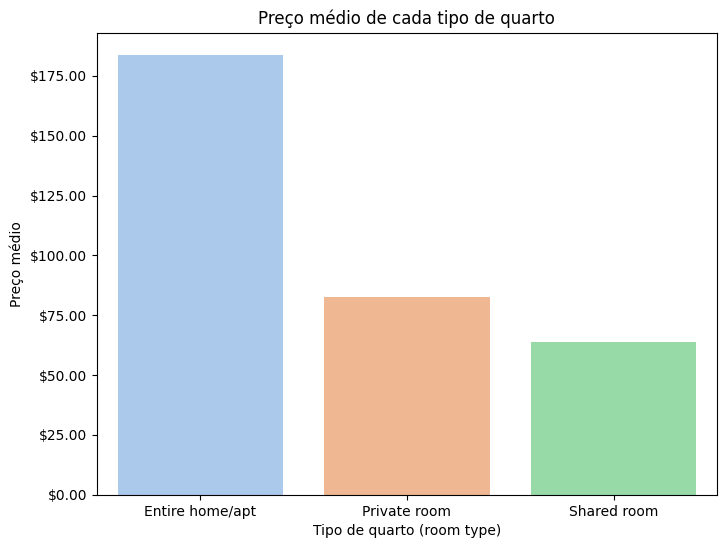

In [58]:
fig, ax = plt.subplots(figsize =(8, 6))
sns.barplot(data_clean, x="room_type", y="price", palette="pastel", hue="room_type", errorbar=None, ax=ax)
plt.xlabel('Tipo de quarto (room type)')
plt.ylabel('Preço médio')
plt.title('Preço médio de cada tipo de quarto')
ax.yaxis.set_major_formatter('${x:1.2f}')
plt.show()

Por fim, foi plotado um gráfico de barras com o número mínimo de noites médio para cada tipo de quarto.

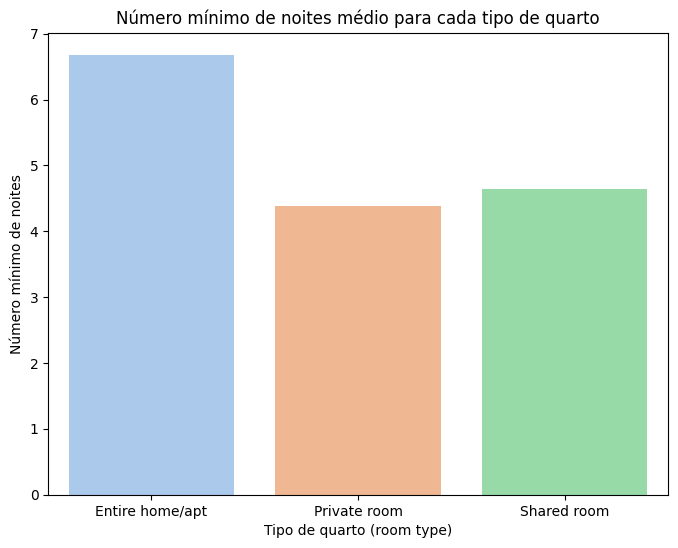

In [59]:
fig, ax = plt.subplots(figsize =(8, 6))
sns.barplot(data_clean, x="room_type", y="minimo_noites", palette="pastel", hue="room_type", errorbar=None, ax=ax)
plt.xlabel('Tipo de quarto (room type)')
plt.ylabel('Número mínimo de noites')
plt.title('Número mínimo de noites médio para cada tipo de quarto')
plt.show()

#### Análise de bairro (bairro) e de grupo de bairro (bairro_group)

Primeiramente, foi calculada a percentagem de listagens em cada bairro. Como há 221 bairros, não é possível visualizar de maneira eficiente todos eles em um gráfico, portanto os bairros selecionados foram aqueles que representam 80% das listagens, totalizando 36 bairros.

In [60]:
# Contando a ocorrência de cada bairro nas listagens
count_bairros = data_clean['bairro'].value_counts()

# Calculando total e ocorrências de bairros
total = count_bairros.sum()

# Inicializando tabela de bairros a ser preenchida
bairros_selection = pd.DataFrame([], columns=['bairro', 'count'])

# Inicializando variável auxiliar usada para calcular a percentagem já selecionada
aux = 0

# Selecionando os bairros que representam 80% das listagens, em ordem decrescente
for x in count_bairros.index:
    bairros_selection.loc[len(bairros_selection.index)] = [x, count_bairros.loc[x]]
    aux += count_bairros.loc[x]
    if aux/total >= 0.8:
        break

Plotando gráfico de barras com a percentagem de listagens referente a cada bairro.

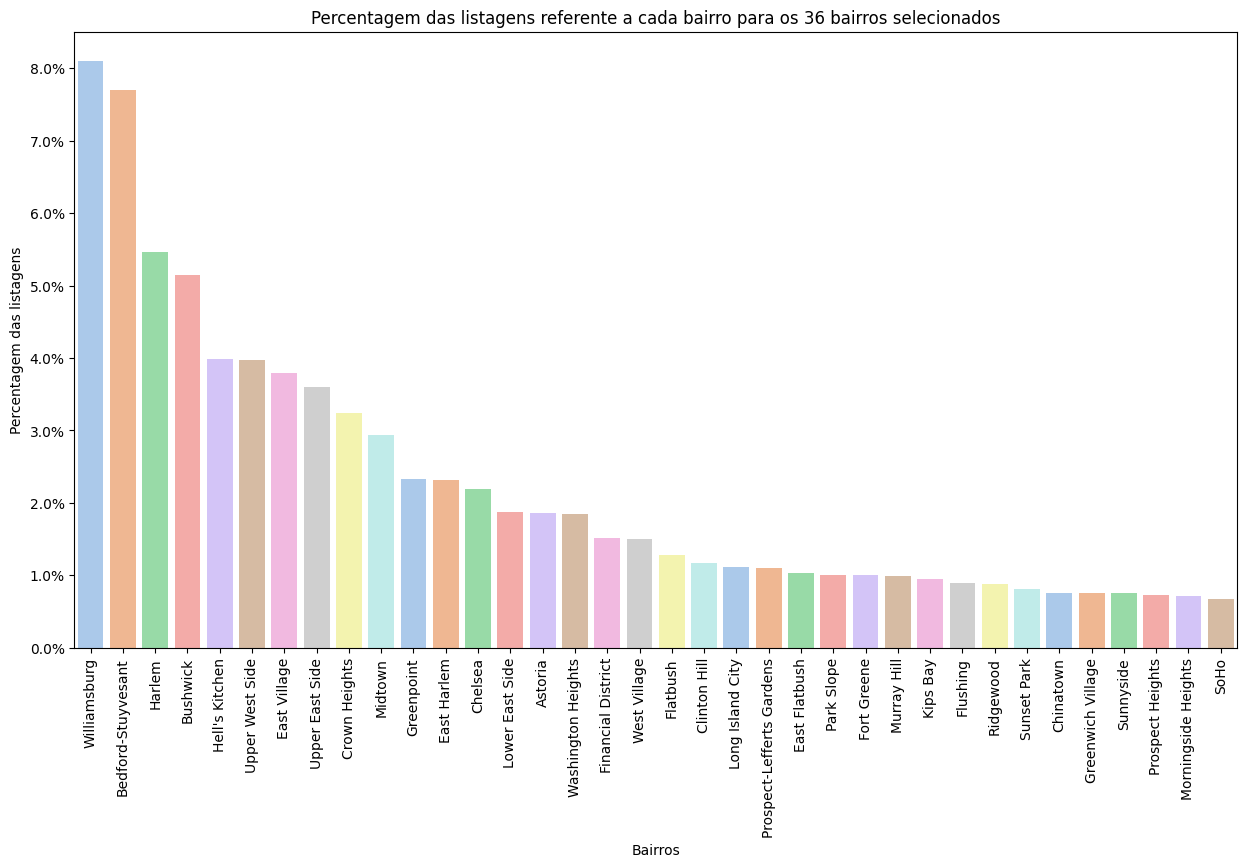

In [61]:
fig, ax = plt.subplots(figsize =(15, 8))
sns.barplot(bairros_selection, x="bairro", y=bairros_selection['count']*100/total, palette="pastel", hue="bairro", ax=ax)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.tick_params(axis='x', rotation=90)
plt.xlabel('Bairros')
plt.ylabel('Percentagem das listagens')
plt.title('Percentagem das listagens referente a cada bairro para os 36 bairros selecionados')
plt.show()

Para analisar o preço de quartos em cada bairro, foram calculados os valores médios dos mesmos para o bairro referente.

In [62]:
preco_bairro = data_clean[['price','bairro']].groupby('bairro', as_index=False)
avg = preco_bairro.mean()

Plotando um gráfico de barras para o preço médio referente a cada bairro.

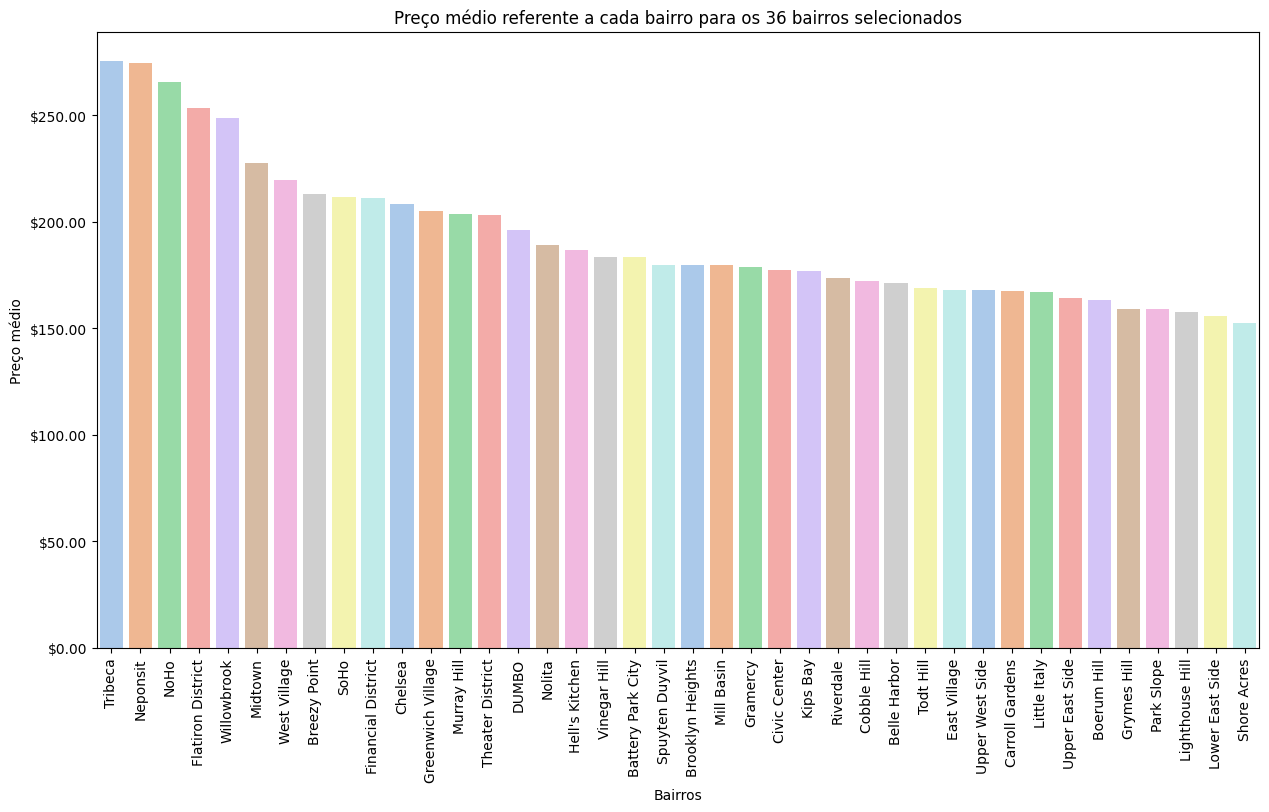

In [63]:
fig, ax = plt.subplots(figsize =(15, 8))
sns.barplot(data=avg.sort_values('price', ascending=False).head(40), x='bairro', y='price', palette="pastel", hue='bairro', ax=ax)
ax.tick_params(axis='x', rotation=90)
ax.yaxis.set_major_formatter('${x:1.2f}')
plt.xlabel('Bairros')
plt.ylabel('Preço médio')
plt.title('Preço médio referente a cada bairro para os 36 bairros selecionados')
plt.show()

Finalmente, foi calculado também o preço médio para cada grupo de bairro (bairro_group)

In [64]:
preco_bairro_group = data_clean[['price','bairro_group']].groupby('bairro_group', as_index=False)
avg = preco_bairro_group.mean()

Foi plotado um gráfico de barras mostrando o preço médio para cada grupo de bairro.

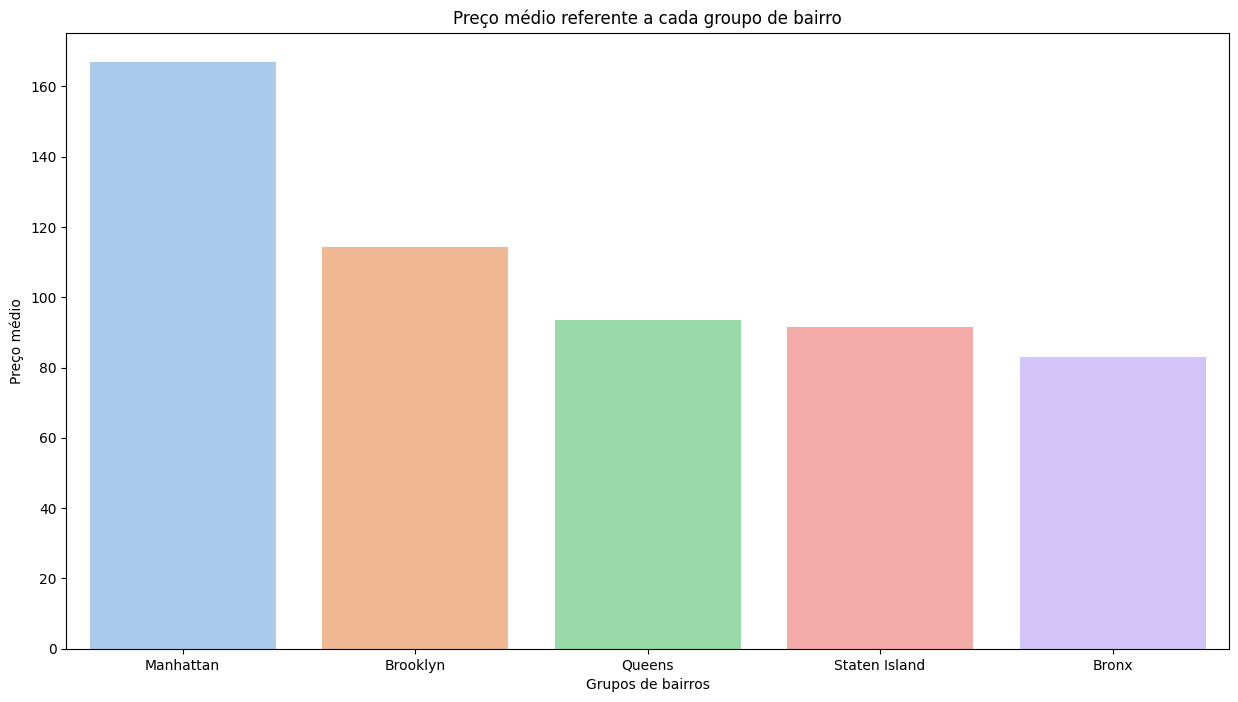

In [65]:
fig, ax = plt.subplots(figsize =(15, 8))
sns.barplot(data=avg.sort_values('price', ascending=False).head(40), x='bairro_group', y='price', palette="pastel", hue='bairro_group', ax=ax)
plt.xlabel('Grupos de bairros')
plt.ylabel('Preço médio')
plt.title('Preço médio referente a cada groupo de bairro')
plt.show()

#### Análise da correlação entre as variáveis

Foram calculadas as correlações entre as variáveis preço, mínimo de noites, disponibilidade 365, número de reviews, reviews por mês e host ID. Em seguida, foi plotado um mapa de calor para melhor visualizar os resultados.

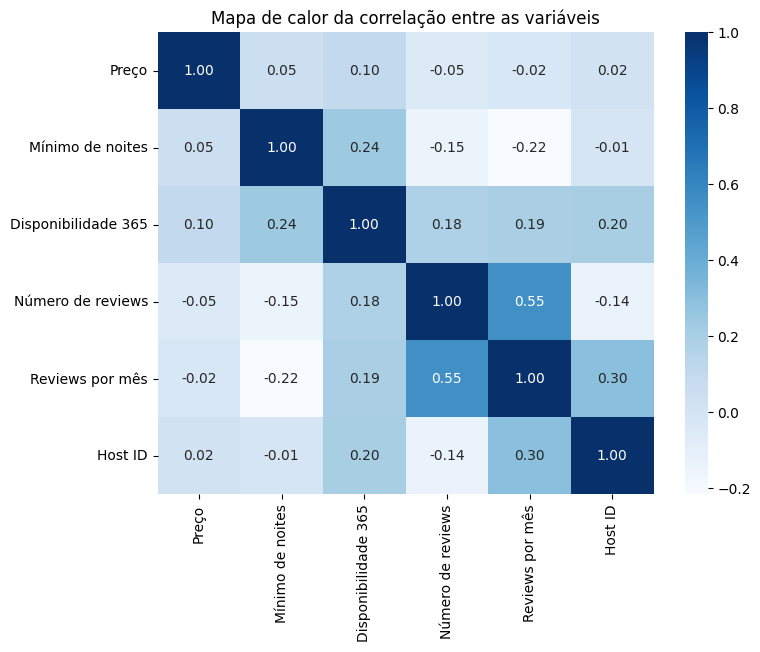

In [66]:
# Calculando a correlação das variáveis selecionadas
correlation = data_clean[['price', 'minimo_noites', 'disponibilidade_365', 'numero_de_reviews', 'reviews_por_mes', 'host_id']].corr()

# Plotando o mapa de calor de correlações
fig, ax = plt.subplots(figsize =(8, 6))
sns.heatmap(correlation, cmap="Blues", annot=True, ax=ax, fmt='.2f', 
            xticklabels=['Preço', 'Mínimo de noites', 'Disponibilidade 365', 'Número de reviews', 'Reviews por mês', 'Host ID'],
            yticklabels=['Preço', 'Mínimo de noites', 'Disponibilidade 365', 'Número de reviews', 'Reviews por mês', 'Host ID'],
            )
plt.yticks(rotation=0)
plt.title('Mapa de calor da correlação entre as variáveis')
plt.show()

#### Análise de distribuição espacial

Para analisar como os dados estão espalhados espacialmente, foram utilizados gráficos de dispersão com as variáveis de latitude e longitude. O primeiro gráfico plotado mostra como as listagens estão espalhadas espacialmente com relação aos grupos de bairro.

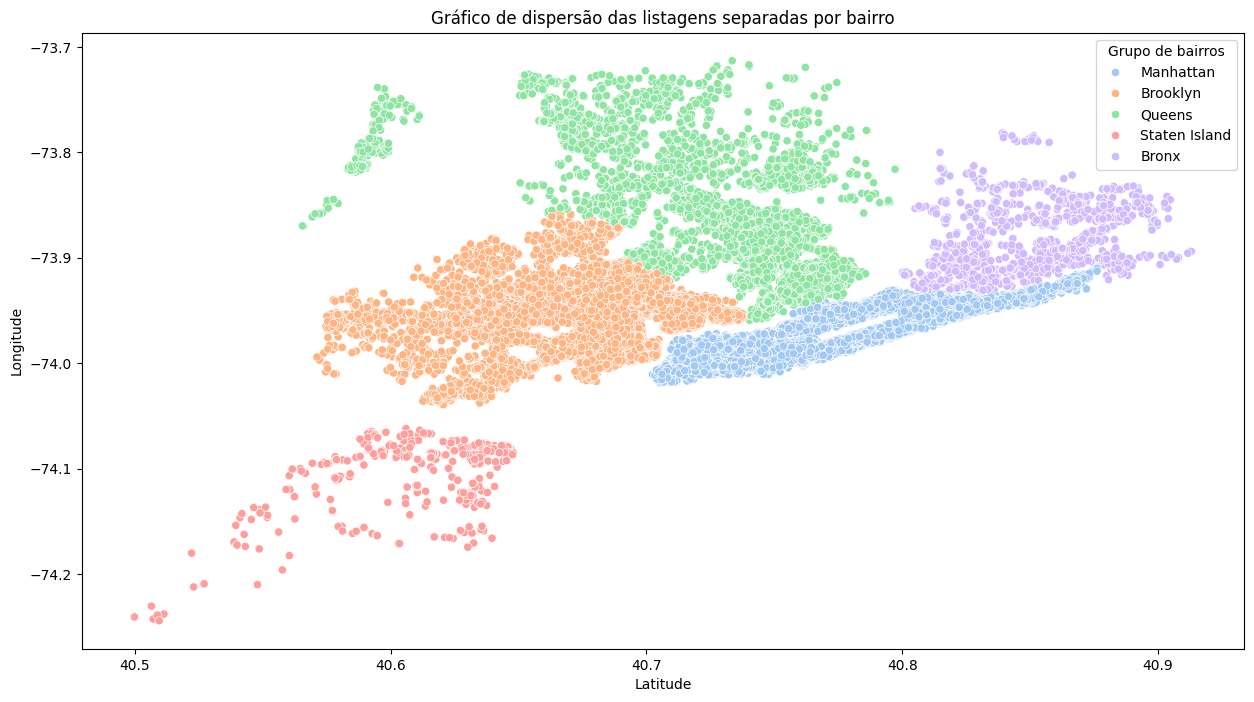

In [67]:
fig, ax = plt.subplots(figsize =(15, 8))
sns.scatterplot(data_clean, x='latitude', y='longitude', palette='pastel', hue='bairro_group', ax=ax)
plt.legend(title='Grupo de bairros')
plt.title('Gráfico de dispersão das listagens separadas por bairro')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Em seguida, um gráfico de dispersão foi plotado para visualizar como os tipos de quarto são espalhados espacialmente.

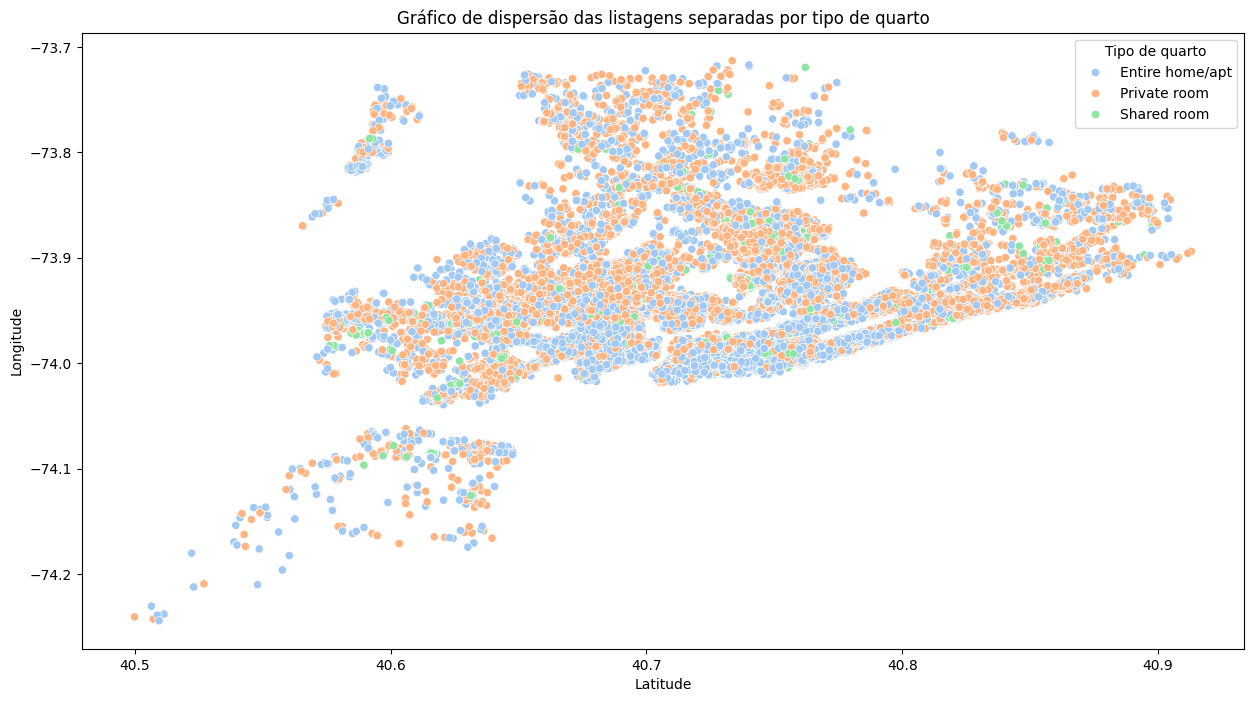

In [68]:
fig, ax = plt.subplots(figsize =(15, 8))
sns.scatterplot(data_clean, x='latitude', y='longitude', palette='pastel', hue='room_type', ax=ax)
plt.legend(title='Tipo de quarto')
plt.title('Gráfico de dispersão das listagens separadas por tipo de quarto')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

#### Análise do nome dos anúncios de quartos de valor mais elevado

Para analisar padrões no nome dos anúncios, foi utilizado um WordCloud, onde palavras com maior frequência de ocorrência aparecem maiores na figura. Para isso, foram calculdas a frequência de ocorrência de cada palavra nos nomes.

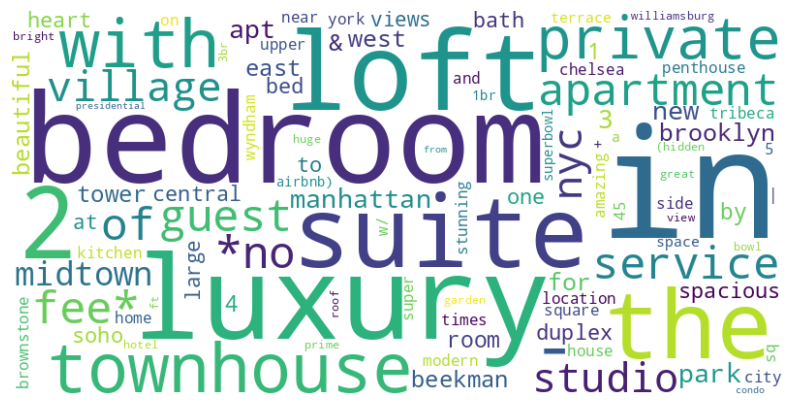

In [69]:
# Selecionando e ordenando decrescentemente anúncios de maior valor
high_price = data[data['price'] > 600][['price', 'nome']].sort_values('price', ascending=False)

# Função que separa strings em palavras
def break_words(sentence):
    return sentence.split()

# Aplicando a função a todos os nomes e aplicando a função de lowercase neles
high_price['nome'] = high_price['nome'].str.lower().apply(break_words)

# Contando a ococrrência de cada palavra dos nomes dos anúncios
pattern = dict(Counter(high_price['nome'].sum()))
wc = WordCloud(width=800, height=400, max_words=100, background_color='white', margin=5, colormap="viridis").generate_from_frequencies(pattern)

# Plotando o WordCloud para os nomes
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Aplicando algoritmos de regressão para cálculo do preço de um anúncio

Para realizar o problema de regressão para o cálculo do preço de anúncios, foram escolhidos dois algoritmos: regressão linear múltipla e random forests.

#### Algoritmo 1: Regressão linear múltipla

O primeiro algoritmo selecionado foi o de regressão linear múltipla, uma vez que estamos tratando de múltiplas variáveis independentes. Para usar as variáveis categóricas na análise (bairro_group, room_type e bairro), é necessário transformá-las em variáveis dummy. Isso é feito com a função get_dummies(). Em seguida os dados são separados nas variáveis x e y.

In [70]:
X = pd.get_dummies(data_clean[['bairro_group', 'room_type', 'bairro']], columns=['bairro_group', 'bairro', 'room_type'], prefix=['bairro_group', 'bairro', 'room_type'])
y = data_clean['price']

Os dados são então separados em teste e treino, com proporção de 20% de teste para 80% de treino e desativando a aleatoriedade da conseguir valores mais concisos.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

A regressão é realizada aplicando as variáveis já separadas e imprimindo o score do modelo.

In [72]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score do modelo: " + str(np.round(regr.score(X_test, y_test), 2)))

Score do modelo: 0.43


Por fim, são calculadas as métricas de sucesso selecionadas, que foram: coeficiente de determinação do treino (${R^2}$), coeficiente de determinação do teste (${R^2}$) e erro médio quadrado.

In [73]:
y_pred = regr.predict(X_test)
rmse = np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2)
r2_train = np.round(r2_score(y_train, regr.predict(X_train), multioutput='variance_weighted'), 2)
r2_test = np.round(r2_score(y_test, y_pred, multioutput='variance_weighted'), 2)
print("Erro médio quadrado: " + str(np.round(rmse, 2)) + '\n' +
      "Coeficiente r2 de treino: " + str(np.round(r2_train, 2)) + '\n' +
      "Coeficiente r2 de teste: " + str(np.round(r2_test, 2)))

Erro médio quadrado: 68.16
Coeficiente r2 de treino: 0.41
Coeficiente r2 de teste: 0.43


Para o exercício em questão, foi aplicada a regressão ao apartamento com as seguintes características:

<code>
{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}
 </code>

In [74]:
# Criando um dataframe inicializado com False e com as colunas referentes às variáveis dummy criadas
new_pred = pd.DataFrame(False, index=[0], columns=X.columns)
new_pred['bairro_group_Manhattan'] = True
new_pred['bairro_Midtown'] = True
new_pred['room_type_Entire home/apt'] = True

# Nova previsão de preço
print("Valor sugerido: $" + str(np.round(regr.predict(new_pred)[0], 2)))

Valor sugerido: $252.94


#### Salvando modelo em formato Pickle

In [75]:
# Salvando o modelo em formato pickle 
joblib.dump(regr, 'multiLinearRegressionModel.pkl') 

['multiLinearRegressionModel.pkl']

#### Algoritmo 2: Random forests

O segundo algoritmo selecionado foi o de random forests, uma vez que ele se mostra um bom algoritmo para regressões de preços de aluguel. Assim como no primeiro algoritmo, para usar as variáveis categóricas na análise (bairro_group, room_type e bairro), é necessário transformá-las em variáveis dummy. Isso é feito com a função get_dummies(). Em seguida os dados são separados nas variáveis x e y.

In [76]:
X = pd.get_dummies(data_clean[['bairro_group', 'room_type', 'bairro']], columns=['bairro_group', 'bairro', 'room_type'], prefix=['bairro_group', 'bairro', 'room_type'])
y = data_clean['price']

Os dados são então separados em teste e treino, com proporção de 20% de teste para 80% de treino e desativando a aleatoriedade da conseguir valores mais concisos.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

A regressão é realizada aplicando as variáveis já separadas e imprimindo o score do modelo.

In [78]:
rf = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Score do modelo: " + str(np.round(rf.score(X_test, y_test), 2)))

Score do modelo: 0.42


Por fim, são calculadas as métricas de sucesso selecionadas, que foram: coeficiente de determinação do treino (${R^2}$), coeficiente de determinação do teste (${R^2}$) e erro médio quadrado.

In [79]:
rmse = np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2)
r2_train = np.round(r2_score(y_train, regr.predict(X_train), multioutput='variance_weighted'), 2)
r2_test = np.round(r2_score(y_test, y_pred, multioutput='variance_weighted'), 2)
print("Erro médio quadrado: " + str(np.round(rmse, 2)) + '\n' +
      "Coeficiente r2 de treino: " + str(np.round(r2_train, 2)) + '\n' +
      "Coeficiente r2 de teste: " + str(np.round(r2_test, 2)))

Erro médio quadrado: 68.46
Coeficiente r2 de treino: 0.41
Coeficiente r2 de teste: 0.42


Para o exercício em questão, foi aplicada a regressão ao apartamento com as seguintes características:

<code>
{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}
 </code>

In [80]:
# Criando um dataframe inicializado com False e com as colunas referentes às variáveis dummy criadas
new_pred = pd.DataFrame(False, index=[0], columns=X.columns)
new_pred['bairro_group_Manhattan'] = True
new_pred['bairro_Midtown'] = True
new_pred['room_type_Entire home/apt'] = True

# Nova previsão de preço
print("Valor sugerido: $" + str(np.round(rf.predict(new_pred)[0], 2)))

Valor sugerido: $222.76


#### Salvando modelo em formato pickle

In [81]:
# Salvando o modelo em formato pickle 
joblib.dump(rf, 'randomForestsModel.pkl') 

['randomForestsModel.pkl']